In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [92]:
data = pd.read_csv('ETH-USD.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2096,2021-05-08,3481.988037,3950.165039,3453.768555,3902.647705,3902.647705,5.020849e+10
2097,2021-05-09,3911.463135,3981.259033,3743.989014,3928.844727,3928.844727,5.056829e+10
2098,2021-05-10,3924.413330,4197.473145,3684.451660,3952.293945,3952.293945,6.269179e+10
2099,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN
2100,2021-05-12,4171.833984,4338.957031,4159.453613,4316.969238,4316.969238,5.280788e+10


In [93]:
data_training = data[data['Date']< '2019-12-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-12,1.058750,1.289940,0.883608,1.217440,1.217440,2.150620e+06
1,2015-08-13,1.222240,1.965070,1.171990,1.827670,1.827670,4.068680e+06
2,2015-08-14,1.810920,2.261880,1.754750,1.827870,1.827870,4.637030e+06
3,2015-08-15,1.802890,1.877240,1.570980,1.688900,1.688900,2.554360e+06
4,2015-08-16,1.684350,1.695240,1.089810,1.566030,1.566030,3.550790e+06
...,...,...,...,...,...,...,...
1567,2019-11-26,146.404312,150.004761,145.216873,148.965073,148.965073,7.648516e+09
1568,2019-11-27,148.396820,154.887207,143.525604,153.010559,153.010559,8.778095e+09
1569,2019-11-28,153.069244,156.613586,151.091125,151.717575,151.717575,7.346532e+09
1570,2019-11-29,151.768600,156.848404,151.460434,155.304153,155.304153,7.503898e+09


In [94]:
data_test = data[data['Date']> '2021-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
1970,2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,1.974077e+10
1971,2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,4.520046e+10
1972,2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,5.694599e+10
1973,2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,4.153593e+10
1974,2021-01-06,1101.005005,1209.428589,1064.233398,1207.112183,1207.112183,4.469991e+10
...,...,...,...,...,...,...,...
2096,2021-05-08,3481.988037,3950.165039,3453.768555,3902.647705,3902.647705,5.020849e+10
2097,2021-05-09,3911.463135,3981.259033,3743.989014,3928.844727,3928.844727,5.056829e+10
2098,2021-05-10,3924.413330,4197.473145,3684.451660,3952.293945,3952.293945,6.269179e+10
2099,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,1.05875,1.28994,0.883608,1.21744,2150620.0
1,1.22224,1.96507,1.171990,1.82767,4068680.0
2,1.81092,2.26188,1.754750,1.82787,4637030.0
3,1.80289,1.87724,1.570980,1.68890,2554360.0
4,1.68435,1.69524,1.089810,1.56603,3550790.0


In [96]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[4.48918594e-04, 5.63357778e-04, 3.58640911e-04, 5.60615536e-04,
        1.09771827e-04],
       [5.65943889e-04, 1.03468660e-03, 5.82161819e-04, 9.97747673e-04,
        2.12554241e-04],
       [9.87317983e-04, 1.24189870e-03, 1.03385105e-03, 9.97890941e-04,
        2.43010214e-04],
       ...,
       [1.09257243e-01, 1.08999527e-01, 1.16782415e-01, 1.08369877e-01,
        3.93670577e-01],
       [1.08326248e-01, 1.09163461e-01, 1.17068661e-01, 1.10939086e-01,
        4.02103311e-01],
       [1.10844276e-01, 1.09053781e-01, 1.16886444e-01, 1.08958789e-01,
        3.51841850e-01]])

In [97]:
X_train = []
Y_train = []

In [98]:
training_data.shape[0]

1572

In [99]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [100]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [101]:
X_train.shape

(1512, 60, 5)

# Building LSTM

In [102]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [103]:
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

In [104]:
    regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
    regressor.add(Dropout(0.3))

    regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
    regressor.add(Dropout(0.4))

    regressor.add(LSTM(units = 120, activation = 'relu'))
    regressor.add(Dropout(0.5))

    regressor.add(Dense(units =1))

In [105]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)              

In [106]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [107]:
regressor.fit(X_train, Y_train, epochs = 20, batch_size = 50)

Epoch 1/20
31/31 [==============================] - 15s 180ms/step - loss: 0.0333
Epoch 2/20
31/31 [==============================] - 6s 178ms/step - loss: 0.0060 4s  - ETA: 1s - l
Epoch 3/20
31/31 [==============================] - 6s 181ms/step - loss: 0.0041
Epoch 4/20
31/31 [==============================] - 6s 180ms/step - loss: 0.0041
Epoch 5/20
31/31 [==============================] - 6s 182ms/step - loss: 0.0044
Epoch 6/20
31/31 [==============================] - 6s 182ms/step - loss: 0.0035
Epoch 7/20
31/31 [==============================] - 6s 184ms/step - loss: 0.0033
Epoch 8/20
31/31 [==============================] - 6s 179ms/step - loss: 0.0030
Epoch 9/20
31/31 [==============================] - 6s 180ms/step - loss: 0.0029 - ETA: 1s - los
Epoch 10/20
31/31 [==============================] - 6s 179ms/step - loss: 0.0030 1s - l
Epoch 11/20
31/31 [==============================] - 6s 179ms/step - loss: 0.0026
Epoch 12/20
31/31 [==============================] - 6s 181ms/ste

 # Test Dataset

In [108]:
past_60_days = data_training.tail(60)
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,177.224060,180.826126,175.334274,180.710510,6.335595e+09
1,180.703705,180.799210,172.599869,175.199341,6.381404e+09
2,175.238434,178.552078,173.564087,176.985001,6.248928e+09
3,176.946320,177.713242,173.069565,176.351517,5.837212e+09
4,176.364380,177.364548,171.299774,173.059143,5.852891e+09


In [109]:
inputs = scaler.transform(df)
inputs

array([[0.12654713, 0.12590304, 0.13557294, 0.12913868, 0.33949786],
       [0.12903785, 0.12588425, 0.13345355, 0.1251908 , 0.34195259],
       [0.12512583, 0.12431546, 0.1342009 , 0.12646994, 0.33485368],
       [0.12634833, 0.12372984, 0.1338176 , 0.12601615, 0.31279116],
       [0.12593178, 0.12348641, 0.13244586, 0.1236577 , 0.31363134],
       [0.12348087, 0.12697134, 0.13262261, 0.12947953, 0.4203452 ],
       [0.12933107, 0.12837012, 0.13851759, 0.13007783, 0.40008762],
       [0.12999171, 0.1353099 , 0.13970738, 0.1381522 , 0.48699656],
       [0.13797624, 0.13502816, 0.14562752, 0.13698199, 0.44883168],
       [0.13698128, 0.13602082, 0.14047735, 0.13047048, 0.48916151],
       [0.13034798, 0.12972793, 0.13917753, 0.12922187, 0.40159052],
       [0.12915066, 0.12886994, 0.13943511, 0.13011622, 0.36080322],
       [0.12998611, 0.13042517, 0.14047769, 0.13361608, 0.38991891],
       [0.13352828, 0.1307437 , 0.1387729 , 0.12963693, 0.4142974 ],
       [0.12949598, 0.1264912 , 0.

In [110]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [111]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((131, 60, 5), (131,))

In [112]:
X_test

array([[[0.12654713, 0.12590304, 0.13557294, 0.12913868, 0.33949786],
        [0.12903785, 0.12588425, 0.13345355, 0.1251908 , 0.34195259],
        [0.12512583, 0.12431546, 0.1342009 , 0.12646994, 0.33485368],
        ...,
        [0.10925724, 0.10899953, 0.11678241, 0.10836988, 0.39367058],
        [0.10832625, 0.10916346, 0.11706866, 0.11093909, 0.40210331],
        [0.11084428, 0.10905378, 0.11688644, 0.10895879, 0.35184185]],

       [[0.12903785, 0.12588425, 0.13345355, 0.1251908 , 0.34195259],
        [0.12512583, 0.12431546, 0.1342009 , 0.12646994, 0.33485368],
        [0.12634833, 0.12372984, 0.1338176 , 0.12601615, 0.31279116],
        ...,
        [0.10832625, 0.10916346, 0.11706866, 0.11093909, 0.40210331],
        [0.11084428, 0.10905378, 0.11688644, 0.10895879, 0.35184185],
        [0.5225095 , 0.54895079, 0.55627053, 0.55451887, 1.05783636]],

       [[0.12512583, 0.12431546, 0.1342009 , 0.12646994, 0.33485368],
        [0.12634833, 0.12372984, 0.1338176 , 0.12601615, 0.3

In [113]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

(array([[0.10833377],
        [0.11086144],
        [0.12697634],
        [0.16766077],
        [0.23398095],
        [0.32146618],
        [0.42086712],
        [0.5205198 ],
        [0.6087483 ],
        [0.6809914 ],
        [0.73735386],
        [0.7722777 ],
        [0.78620106],
        [0.78580433],
        [0.77703744],
        [0.7642619 ],
        [0.74997586],
        [0.73550385],
        [0.7276021 ],
        [0.7286807 ],
        [0.73539823],
        [0.7433053 ],
        [0.7478264 ],
        [0.75062305],
        [0.75483304],
        [0.76026386],
        [0.76532817],
        [0.7688834 ],
        [0.77508795],
        [0.7802299 ],
        [0.78130704],
        [0.7784599 ],
        [0.77821875],
        [0.78543913],
        [0.8015505 ],
        [0.824949  ],
        [0.8523909 ],
        [0.8782566 ],
        [0.903243  ],
        [0.92742   ],
        [0.9486757 ],
        [0.96454334],
        [0.9762657 ],
        [0.9843759 ],
        [0.98876965],
        [0

In [114]:
scaler.scale_

array([7.15794819e-04, 6.98130468e-04, 7.75086200e-04, 7.16339965e-04,
       5.35866517e-11])

In [115]:
scale = 1/7.15794819e-04
scale

1397.0483907623811

In [116]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [117]:
Y_pred


array([[ 151.34752],
       [ 154.87878],
       [ 177.39209],
       [ 234.23021],
       [ 326.8827 ],
       [ 449.1038 ],
       [ 587.9717 ],
       [ 727.1913 ],
       [ 850.4508 ],
       [ 951.3779 ],
       [1030.119  ],
       [1078.9093 ],
       [1098.3608 ],
       [1097.8066 ],
       [1085.5588 ],
       [1067.7108 ],
       [1047.7526 ],
       [1027.5344 ],
       [1016.49536],
       [1018.00214],
       [1027.3868 ],
       [1038.4335 ],
       [1044.7496 ],
       [1048.6567 ],
       [1054.5382 ],
       [1062.1254 ],
       [1069.2004 ],
       [1074.1672 ],
       [1082.8353 ],
       [1090.0189 ],
       [1091.5237 ],
       [1087.5461 ],
       [1087.2092 ],
       [1097.2964 ],
       [1119.8048 ],
       [1152.4937 ],
       [1190.8313 ],
       [1226.9669 ],
       [1261.8741 ],
       [1295.6506 ],
       [1325.3458 ],
       [1347.5137 ],
       [1363.8904 ],
       [1375.2207 ],
       [1381.359  ],
       [1384.0074 ],
       [1383.7638 ],
       [1382.

In [118]:
Y_test

array([ 729.97105988,  774.08025187,  976.62724883, 1041.06718982,
       1100.57341581, 1207.64677979, 1225.53630679, 1223.30888979,
       1280.43950478, 1261.19133579, 1088.09514381, 1043.30937782,
       1129.79961181, 1221.44560779, 1171.0115258 , 1233.02177979,
       1229.88164279, 1257.00298079, 1374.81682377, 1382.25285876,
       1118.45744881, 1234.83635479, 1230.77898179, 1390.20830376,
       1323.31010977, 1357.90178477, 1250.84819579, 1368.65520277,
       1381.80034476, 1376.39201877, 1314.42363578, 1369.07353777,
       1514.33806374, 1660.73857672, 1594.36174573, 1717.36589571,
       1677.17412371, 1613.21062273, 1746.4945577 , 1767.6082057 ,
       1743.2826437 , 1783.0575467 , 1843.55522669, 1813.94072469,
       1804.24516869, 1778.5139677 , 1780.9185087 , 1847.77470969,
       1938.42827367, 1959.47136467, 1918.24150667, 1935.12627167,
       1780.9774687 , 1571.04485073, 1624.96233172, 1478.22173075,
       1446.49785375, 1459.42888475, 1416.71953376, 1563.63188

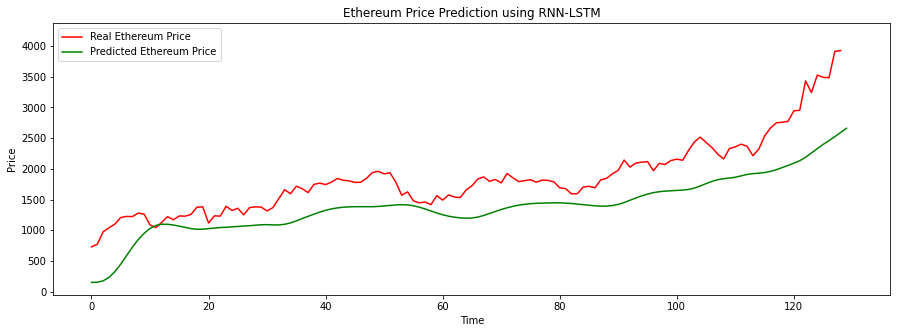

In [119]:
plt.figure(figsize=(15,5))
plt.plot(Y_test, color = 'red', label = 'Real Ethereum Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()